

---


Customer Segmentation:
# **Can you segment customers by purchasing behavior?**

---



# **Initialize**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale

# **Load data**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
dfrs = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv', encoding = "ISO-8859-1")

In [7]:
dfrs.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


As it can be seen above, Product 2 and Product 3 have missing values.

# **Prepare data**

In [8]:
# Handle missing values by replacing NaNs with 0
dfrs.fillna(0, inplace=True)

In [10]:
# Aggregate data by User_ID
df_user = dfrs.groupby('User_ID').agg({
    'Purchase': 'sum',
    'Product_Category_1': 'sum',
    'Product_Category_2': 'sum',
    'Product_Category_3': 'sum'
}).reset_index()


 Summarizes the data by User_ID to get the total purchase amount and sums of product categories.

In [12]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_user[['Purchase', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']])
df_user_scaled = pd.DataFrame(scaled_features, columns=['Purchase', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3'])

# Display the first few rows of the prepared data
print(df_user_scaled.head())

   Purchase  Product_Category_1  Product_Category_2  Product_Category_3
0 -0.562679           -0.484028           -0.705228           -0.539828
1 -0.057807           -0.249998           -0.127610            0.000670
2 -0.554686           -0.683203           -0.726516           -0.539828
3 -0.697937           -0.782791           -0.747804           -0.593622
4 -0.046648            0.256239            0.018568           -0.388694


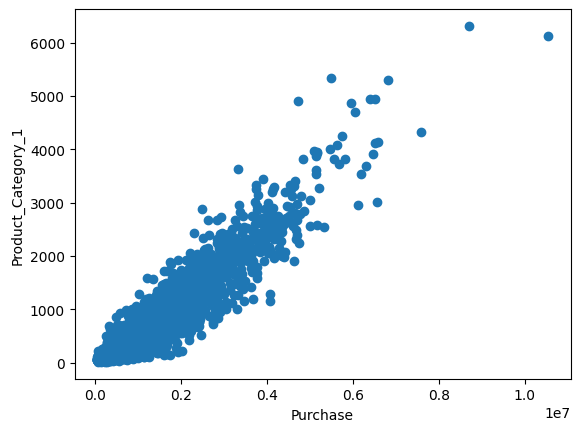

In [18]:
import matplotlib.pyplot as plt

# Visualize scatterplot
plt.scatter(df_user['Purchase'], df_user['Product_Category_1'])
plt.xlabel('Purchase')
plt.ylabel('Product_Category_1')
plt.show()

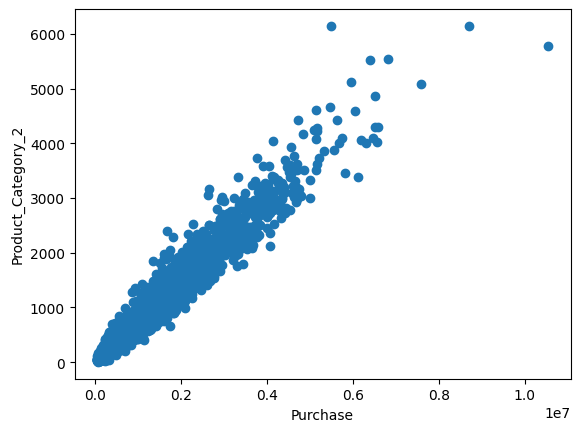

In [19]:
import matplotlib.pyplot as plt

# Visualize scatterplot
plt.scatter(df_user['Purchase'], df_user['Product_Category_2'])
plt.xlabel('Purchase')
plt.ylabel('Product_Category_2')
plt.show()

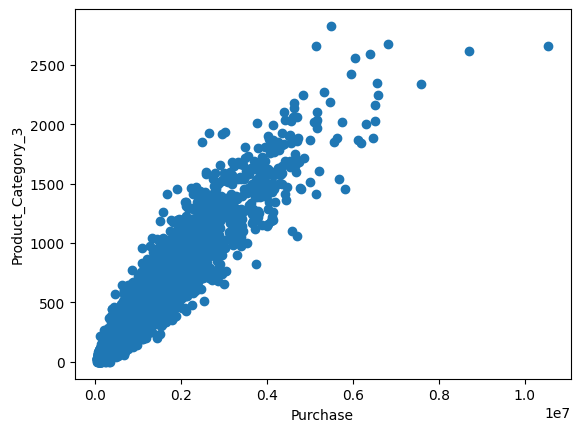

In [20]:
import matplotlib.pyplot as plt

# Visualize scatterplot
plt.scatter(df_user['Purchase'], df_user['Product_Category_3'])
plt.xlabel('Purchase')
plt.ylabel('Product_Category_3')
plt.show()

# **K means clustering**
In order to segment the customers, let's start by randomly assigning them to 'n' clusters. Thereafter, each customer is reassigned to another cluster that it is closer to, and this process is repeated until no more improvements are possible. This method is known as K-Means Clustering.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


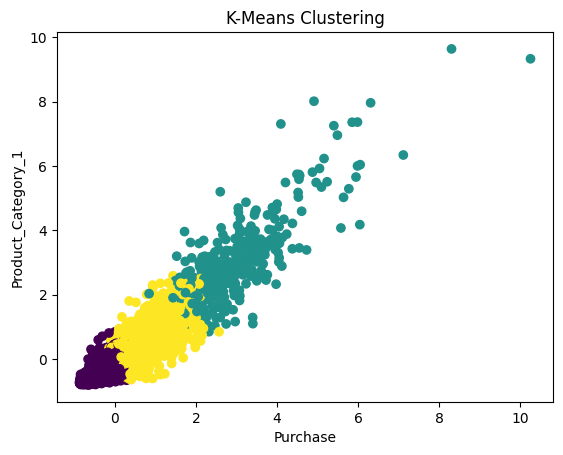

K-Means Silhouette Score: 0.6221849449136084


In [24]:
# Scatter plot of K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(df_user_scaled)
kmeans_labels = kmeans.labels_
plt.scatter(df_user_scaled['Purchase'], df_user_scaled['Product_Category_1'], c=kmeans_labels)
plt.xlabel('Purchase')
plt.ylabel('Product_Category_1')
plt.title('K-Means Clustering')
plt.show()

# Evaluate quality of clusters using Silhouette score
kmeans_silhouette_score = silhouette_score(df_user_scaled, kmeans_labels)
print("K-Means Silhouette Score:", kmeans_silhouette_score)

# **Hierarchical Clustering**

Hierarchical clustering, as the name suggests is an algorithm that builds hierarchy of clusters. This algorithm starts with all the data points assigned to a cluster of their own. Then two nearest clusters are merged into the same cluster. In the end, this algorithm terminates when there is only a single cluster left.

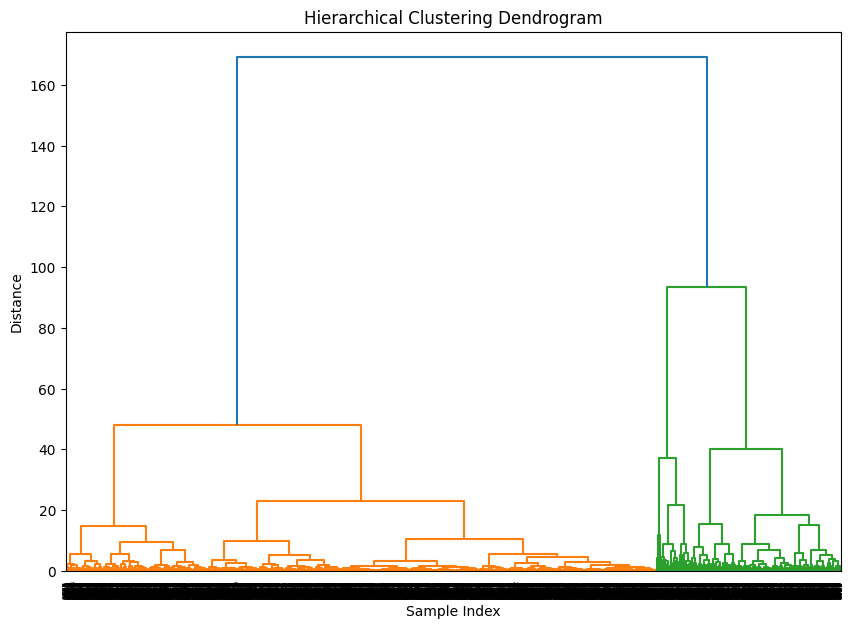

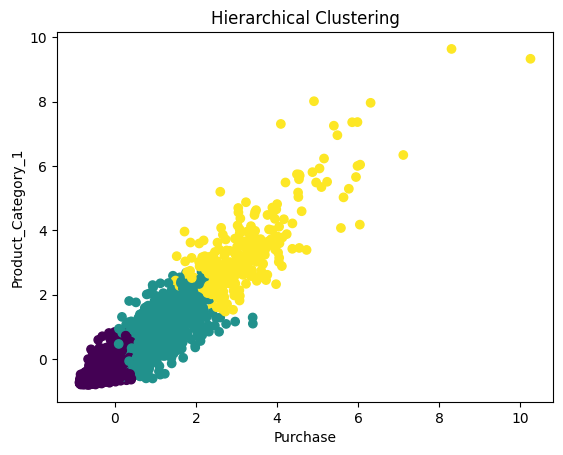

Hierarchical Clustering Silhouette Score: 0.633346763778914


In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Generate linkages between data points for hierarchical clustering
Z = linkage(df_user_scaled, 'ward')

# Visualize Dendrogram of Clusters
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Build Hierarchical Clustering model
hierarchical_clustering = AgglomerativeClustering(n_clusters=3)
hierarchical_clustering.fit(df_user_scaled)
hierarchical_labels = hierarchical_clustering.labels_

# Scatter plot of Hierarchical Clustering
plt.scatter(df_user_scaled['Purchase'], df_user_scaled['Product_Category_1'], c=hierarchical_labels)
plt.xlabel('Purchase')
plt.ylabel('Product_Category_1')
plt.title('Hierarchical Clustering')
plt.show()

# Evaluate quality of clusters using Silhouette score
hierarchical_silhouette_score = silhouette_score(df_user_scaled, hierarchical_labels)
print("Hierarchical Clustering Silhouette Score:", hierarchical_silhouette_score)

Its slightly better than K means clustering.

# **DBScan Clustering and Anomaly Detection**

DBScan stands for Density-Based Spatial Clustering of Applications with Noise. Given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away).

   eps  num_clusters  num_anomalies  silhouette
0  0.1            21           2010    0.002237
1  0.2            11            759    0.323596
2  0.3             7            377    0.529513
3  0.4             4            183    0.538962
4  0.5             1             95    0.742893
5  0.6             2             59    0.737371
6  0.7             3             39    0.738598


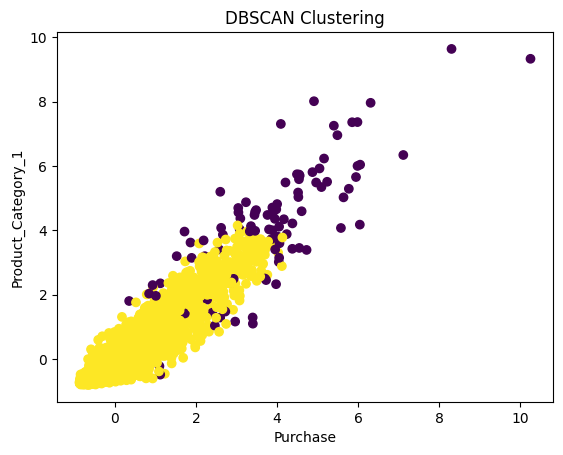

DBSCAN Silhouette Score: 0.7428926469224018
Number of clusters: 1
Number of anomalies: 95


In [30]:
# Function for DBSCAN Clustering and evaluation
def cluster_dbscan(X, eps):
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(X)
    labels = dbscan.labels_
    silhouette = silhouette_score(X, labels)

    # Count number of clusters and anomalies
    num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    num_anomalies = list(labels).count(-1)

    return num_clusters, num_anomalies, silhouette

# Iterate over different values of eps to determine best silhouette score
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
results = []

for eps in eps_values:
    num_clusters, num_anomalies, silhouette = cluster_dbscan(df_user_scaled, eps)
    results.append((eps, num_clusters, num_anomalies, silhouette))

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['eps', 'num_clusters', 'num_anomalies', 'silhouette'])
print(results_df)

# Choose the best epsilon value based on silhouette score
best_eps = results_df.loc[results_df['silhouette'].idxmax()]['eps']

# Build and fit DBSCAN model with the best epsilon
dbscan = DBSCAN(eps=best_eps)
dbscan.fit(df_user_scaled)
dbscan_labels = dbscan.labels_

# Scatter plot of DBSCAN Clustering
plt.scatter(df_user_scaled['Purchase'], df_user_scaled['Product_Category_1'], c=dbscan_labels)
plt.xlabel('Purchase')
plt.ylabel('Product_Category_1')
plt.title('DBSCAN Clustering')
plt.show()

# Evaluate quality of clusters using Silhouette score
dbscan_silhouette_score = silhouette_score(df_user_scaled, dbscan_labels)
print("DBSCAN Silhouette Score:", dbscan_silhouette_score)

# Calculate number of clusters and anomalies
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
num_anomalies = list(dbscan_labels).count(-1)
print("Number of clusters:", num_clusters)
print("Number of anomalies:", num_anomalies)

Silhouette Score of DBSCAN clustering is better than K means clustering and hyrercial clustering.